In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('credit_customers_upload.csv')

In [53]:
df.head()

,Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,...,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Etranger,Cible,ID
0,A11,12,A30,A45,1108,A61,A74,4,A93,A101,...,-1,A143,A152,2,A173,1,A191,-1,2,90
1,A12,24,A30,A49,4241,A61,A73,1,A93,A101,...,36,A143,A152,3,A172,1,-1,-1,2,598
2,A11,30,A30,A42,4583,A61,A73,2,A91,A103,...,32,A143,A152,2,A173,1,-1,A201,1,647
3,A12,12,A30,A48,1410,A61,A73,2,A93,A101,...,31,A143,A152,1,A172,1,-1,A201,1,783
4,A12,15,A30,A40,1778,A61,A72,2,A92,A101,...,26,A143,A151,2,A171,1,-1,A201,2,810


In [54]:
# importer les données depuis gcloud storage
df_storage=pd.read_csv('gs://ynov-training/credit_customers_upload.csv')
df_storage.head()

,Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,...,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Etranger,Cible,ID
0,A11,12,A30,A45,1108,A61,A74,4,A93,A101,...,-1,A143,A152,2,A173,1,A191,-1,2,90
1,A12,24,A30,A49,4241,A61,A73,1,A93,A101,...,36,A143,A152,3,A172,1,-1,-1,2,598
2,A11,30,A30,A42,4583,A61,A73,2,A91,A103,...,32,A143,A152,2,A173,1,-1,A201,1,647
3,A12,12,A30,A48,1410,A61,A73,2,A93,A101,...,31,A143,A152,1,A172,1,-1,A201,1,783
4,A12,15,A30,A40,1778,A61,A72,2,A92,A101,...,26,A143,A151,2,A171,1,-1,A201,2,810


In [19]:
# Exploration des données

In [55]:
df_storage.columns 

Index(['Comptes', 'Duree_credit', 'Historique_credit', 'Objet_credit',
       'Montant_credit', 'Epargne', 'Anciennete_emploi', 'Taux_effort',
       'Situation_familiale', 'Garanties', 'Anciennete_domicile', 'Biens',
       'Age', 'Autres_credits', 'Statut_domicile', 'Nb_credits', 'Type_emploi',
       'Nb_pers_charge', 'Telephone', 'Etranger', 'Cible', 'ID'],
      dtype='object')

In [56]:
def afficher_colonnes_par_type(data):
    """
    Affiche toutes les colonnes du DataFrame en fonction de leur type.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    for dtype in data.dtypes.unique():
        print(f"Colonnes de type {dtype}:")
        print(list(data.select_dtypes(include=[dtype]).columns))
        print()
# Afficher les colonnes par type
afficher_colonnes_par_type(df_storage)

Colonnes de type object:
['Comptes', 'Historique_credit', 'Objet_credit', 'Epargne', 'Anciennete_emploi', 'Situation_familiale', 'Garanties', 'Biens', 'Autres_credits', 'Statut_domicile', 'Type_emploi', 'Telephone', 'Etranger']

Colonnes de type int64:
['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile', 'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible', 'ID']



In [57]:
# Exploration des données
def exploration_donnees(data,colonnes):
    """
    Effectue l'exploration des données.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    print("Informations sur les données:")
    print(data.info())
    print("\nStatistiques descriptives:")
    print(data.describe())
    data.drop(colonnes, axis=1)
    
exploration_donnees(df_storage,'ID')

Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Comptes              500 non-null    object
 1   Duree_credit         500 non-null    int64 
 2   Historique_credit    500 non-null    object
 3   Objet_credit         500 non-null    object
 4   Montant_credit       500 non-null    int64 
 5   Epargne              500 non-null    object
 6   Anciennete_emploi    500 non-null    object
 7   Taux_effort          500 non-null    int64 
 8   Situation_familiale  500 non-null    object
 9   Garanties            500 non-null    object
 10  Anciennete_domicile  500 non-null    int64 
 11  Biens                500 non-null    object
 12  Age                  500 non-null    int64 
 13  Autres_credits       500 non-null    object
 14  Statut_domicile      500 non-null    object
 15  Nb_credits           500 no

In [58]:
# Fonction pour voir les valeurs uniques de chaque colonne
def valeurs_uniques(data):
    """
    Affiche les valeurs uniques de chaque colonne d'un DataFrame.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    for colonne in data.columns:
        print("Colonnes:", colonne)
        print(data[colonne].unique())
        print()
        
valeurs_uniques(df_storage)

Colonnes: Comptes
['A11' 'A12' 'A13' 'A14']

Colonnes: Duree_credit
[12 24 30 15  6 48 10 28  7 18  9 14 21 60 11  8 36 47  4  5 27 20 13 42
 39 54 45 22]

Colonnes: Historique_credit
['A30' 'A31' 'A32' 'A33' 'A34']

Colonnes: Objet_credit
['A45' 'A49' 'A42' 'A48' 'A40' 'A43' '-1' 'A41' 'A410' 'A44' 'A46']

Colonnes: Montant_credit
[ 1108  4241  4583  1410  1778   409   783  7485  3447   609   626  2828
  3609  1048  2483  7824  5951  3059  2647  1374  2415  1913  2100   458
  2073  1391  1007  1755  2315  1318  1469  6260  1680  1835  1768  1924
   701 10144   766   709  1577   763  1414  2108  1168  3835  3913  3021
   625   707   866  1258  1925   433  1657  3060  2697  1574 10722  1092
  1076  2515   672  1543  1237   276  1494  3213  4439  1236  1246   776
  2406  3001  3079  1330  1126   983  1223  1473  1053  2579  3448  2136
  1484   660  2576  1424   518   343  1721  3017  1037  1418  1301   759
  3190  1113   662  1534  2864  6999  3234  2930  1388  2039  1217  1572
  2329  2

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


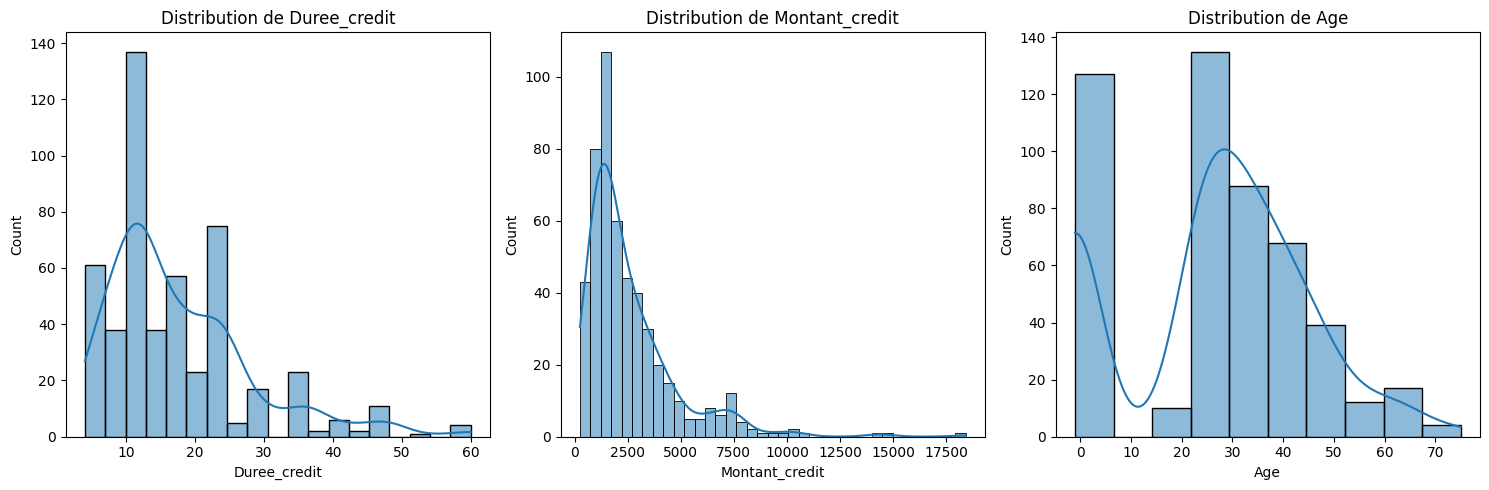

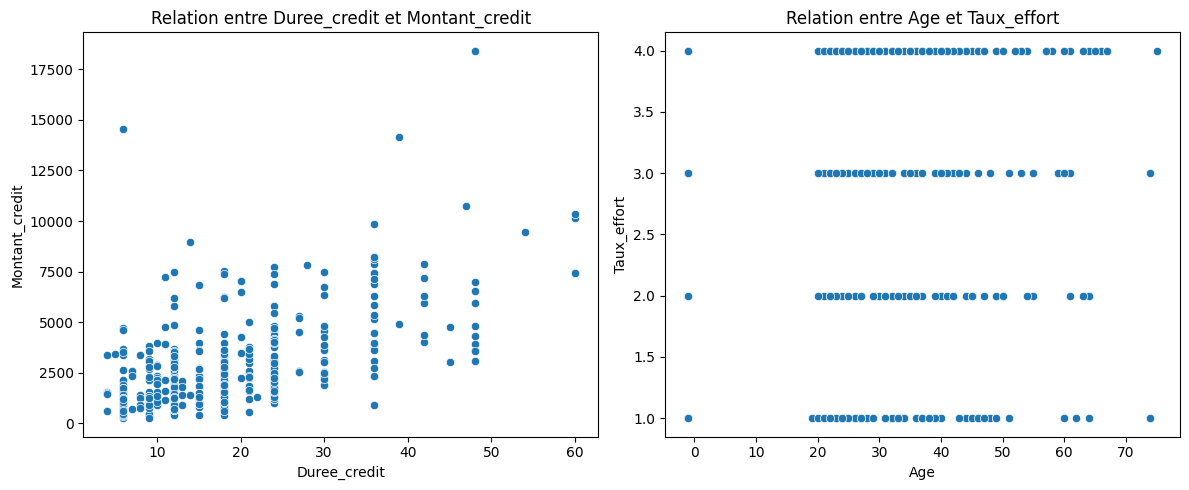

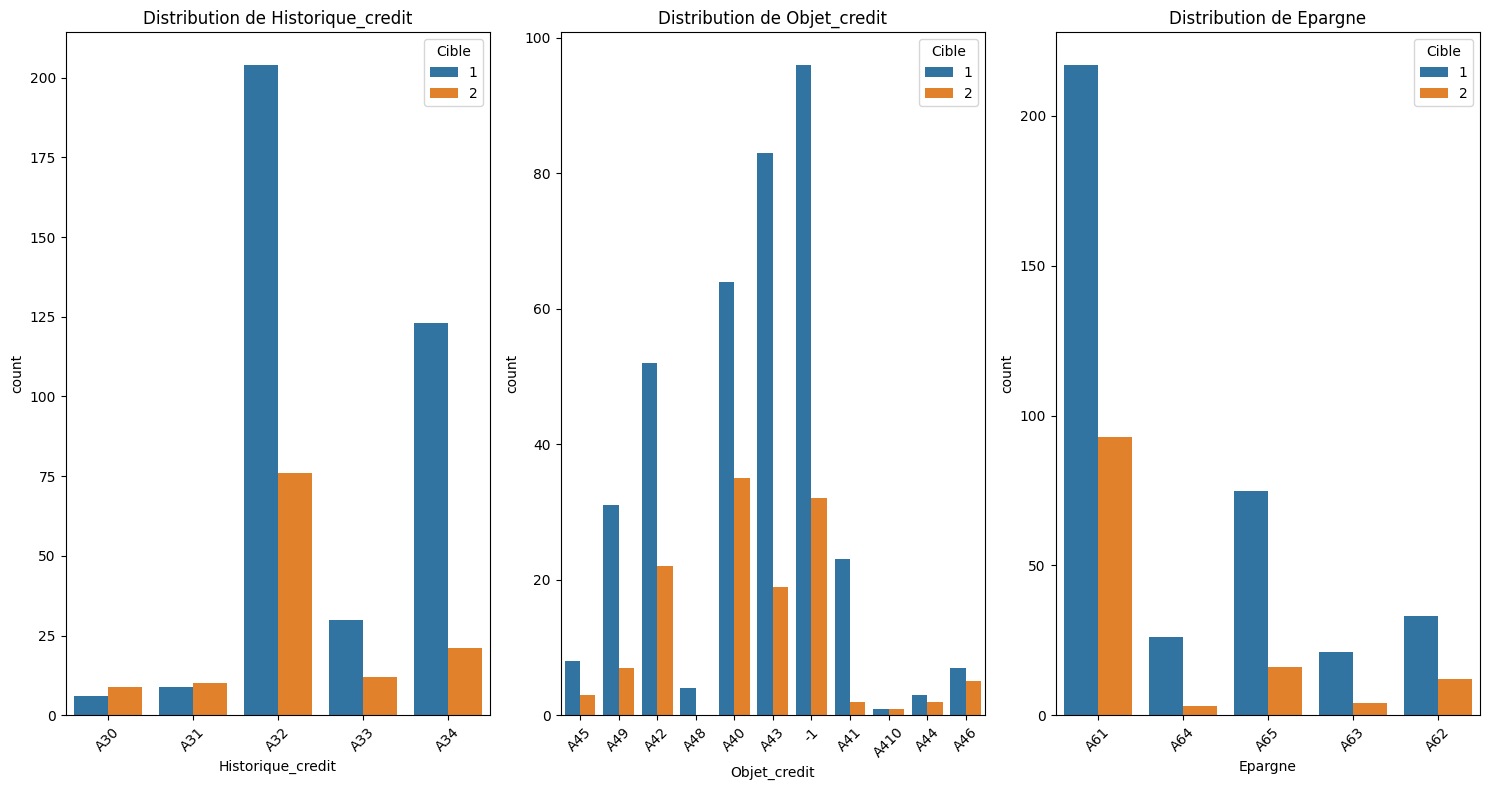

In [59]:
def visualisations_credit(data):
    """
    Crée plusieurs visualisations pour explorer les données de crédit.
    Args:
        data (DataFrame): DataFrame contenant les données de crédit.
    """
    # Histogrammes des variables numériques
    variables_numeriques = ['Duree_credit', 'Montant_credit', 'Age']
    plt.figure(figsize=(15, 5))
    for i, variable in enumerate(variables_numeriques, 1):
        plt.subplot(1, len(variables_numeriques), i)
        sns.histplot(data[variable], kde=True)
        plt.title(f'Distribution de {variable}')
    plt.tight_layout()
    plt.show()
    
    # Graphiques de dispersion pour les relations entre variables
    variables_relations = [('Duree_credit', 'Montant_credit'), ('Age', 'Taux_effort')]
    plt.figure(figsize=(12, 5))
    for i, (variable1, variable2) in enumerate(variables_relations, 1):
        plt.subplot(1, len(variables_relations), i)
        sns.scatterplot(x=variable1, y=variable2, data=data)
        plt.title(f'Relation entre {variable1} et {variable2}')
    plt.tight_layout()
    plt.show()
      
    # Diagrammes à barres pour les variables catégorielles
    variables_categorielles = ['Historique_credit', 'Objet_credit', 'Epargne']
    plt.figure(figsize=(15, 8))
    for i, variable in enumerate(variables_categorielles, 1):
        plt.subplot(1, len(variables_categorielles), i)
        sns.countplot(x=variable, data=data, hue='Cible')
        plt.title(f'Distribution de {variable}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

# Créer des visualisations pour les données de crédit
visualisations_credit(df_storage)


In [34]:
# Preprocessing

In [ ]:
# Recherche des valeurs abberantes

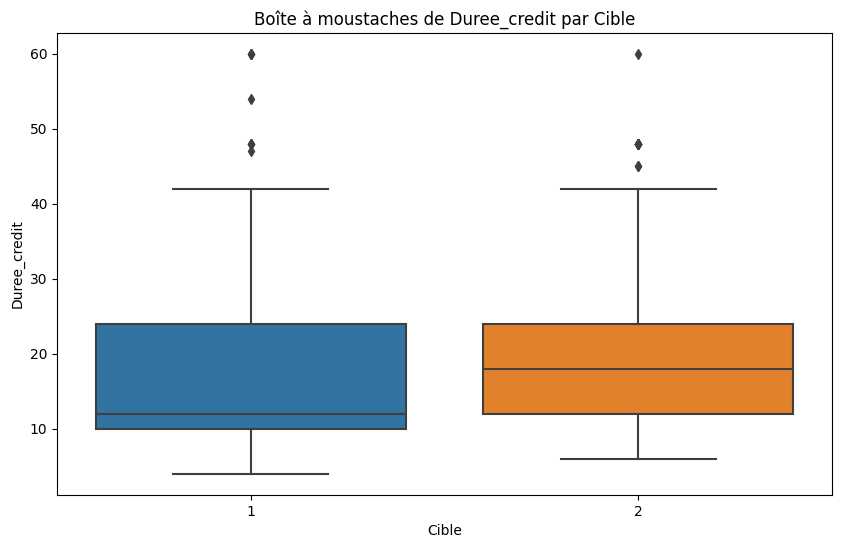

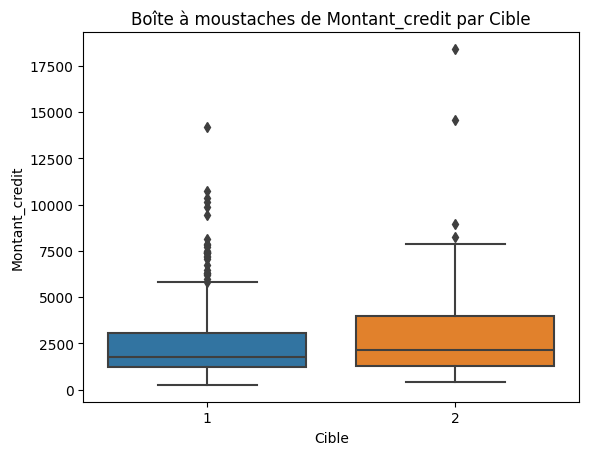

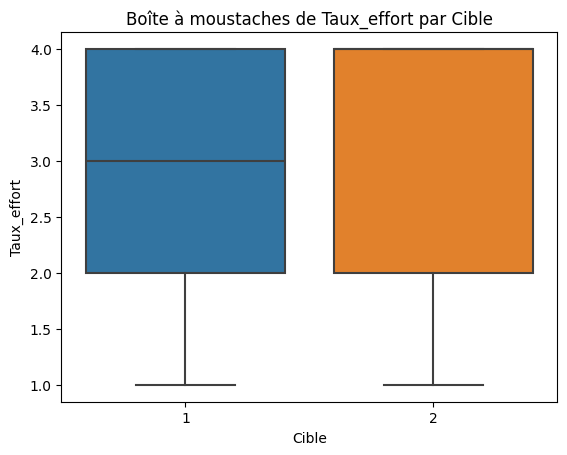

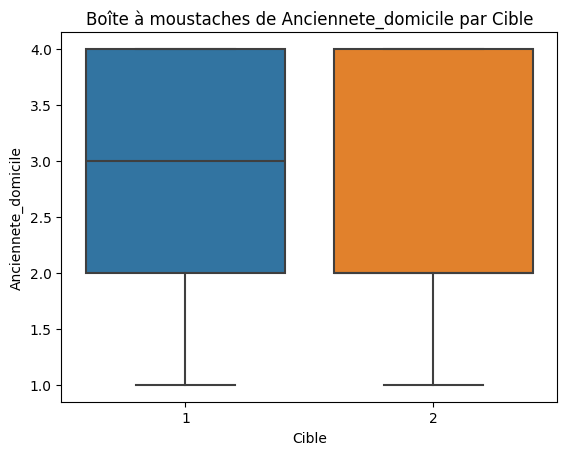

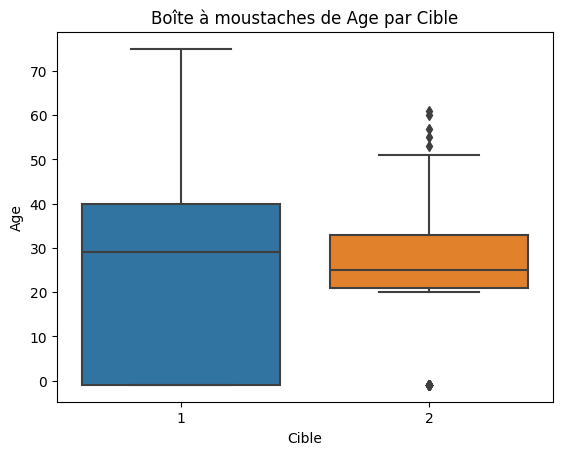

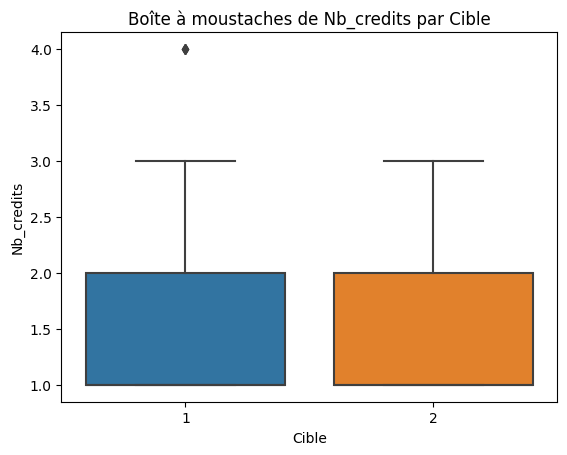

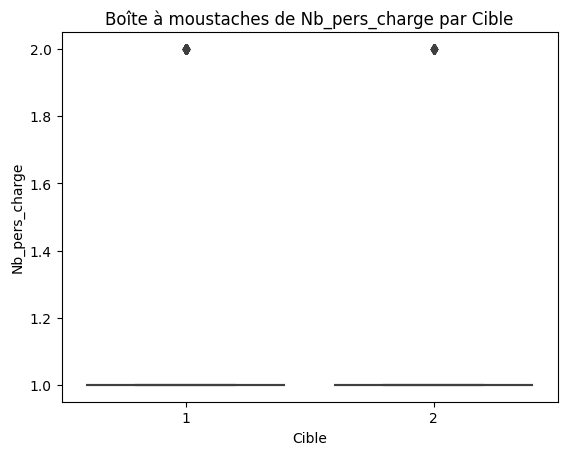

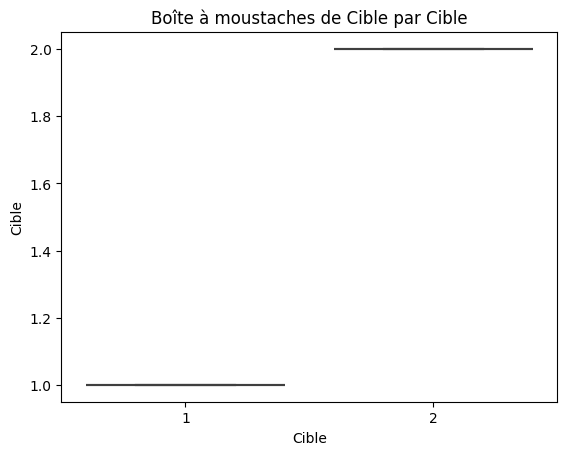

In [60]:
def visualisations_boite_moustache_credit(data):
    """
    Crée plusieurs visualisations pour explorer les données de crédit.
    Args:
        data (DataFrame): DataFrame contenant les données de crédit.
    """
    variables_numeriques = ['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile', 'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible']
    # Boîtes à moustaches des variables numériques par catégorie de la variable cible
    plt.figure(figsize=(10, 6))
    for variable in variables_numeriques:
        sns.boxplot(x='Cible', y=variable, data=data)
        plt.title(f'Boîte à moustaches de {variable} par Cible')
        plt.show()


# Créer des visualisations pour les données de crédit
visualisations_boite_moustache_credit(df_storage)


In [45]:
# recherche des valeurs manquantes

In [80]:
def afficher_valeurs_manquantes(data):
    """
    Affiche le nombre de valeurs manquantes par colonne dans le DataFrame.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    valeurs_manquantes = data.isnull().sum()
    if valeurs_manquantes.sum() == 0:
        print("Aucune valeur manquante trouvée.")
    else:
        print("Valeurs manquantes par colonne :")
        print(valeurs_manquantes[valeurs_manquantes > 0])

# Appeler la fonction pour afficher les valeurs manquantes
afficher_valeurs_manquantes(df_storage)


Aucune valeur manquante trouvée.


In [51]:
# Suppresion des valeurs abberantes

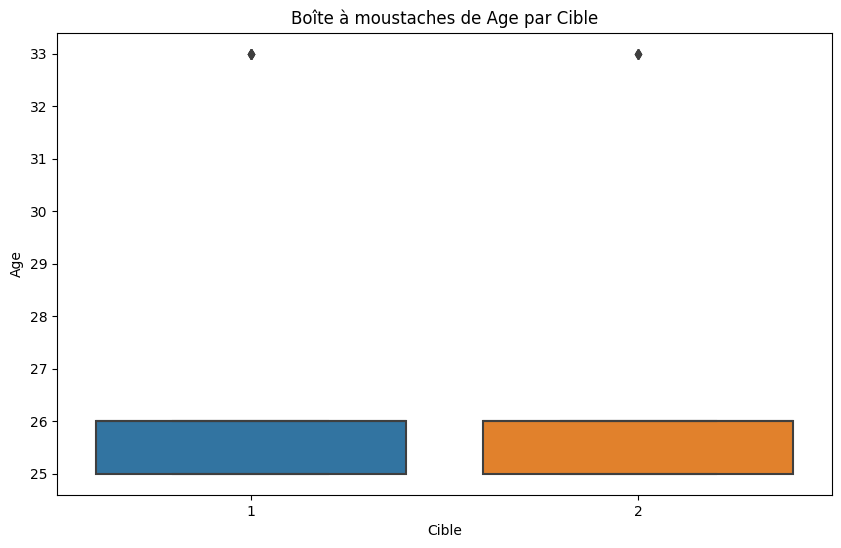

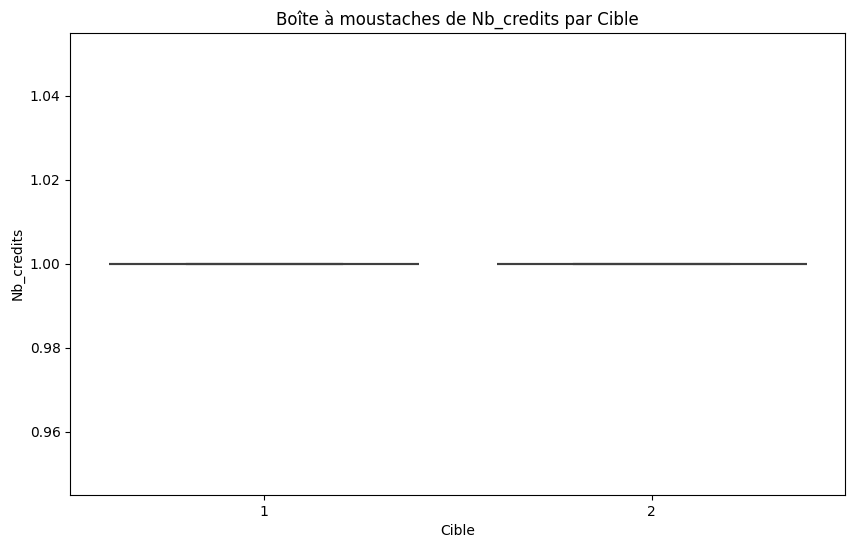

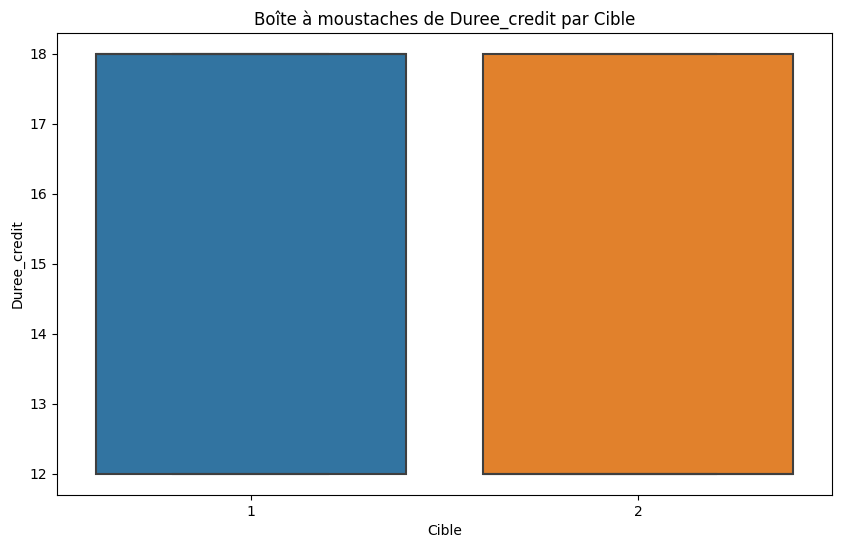

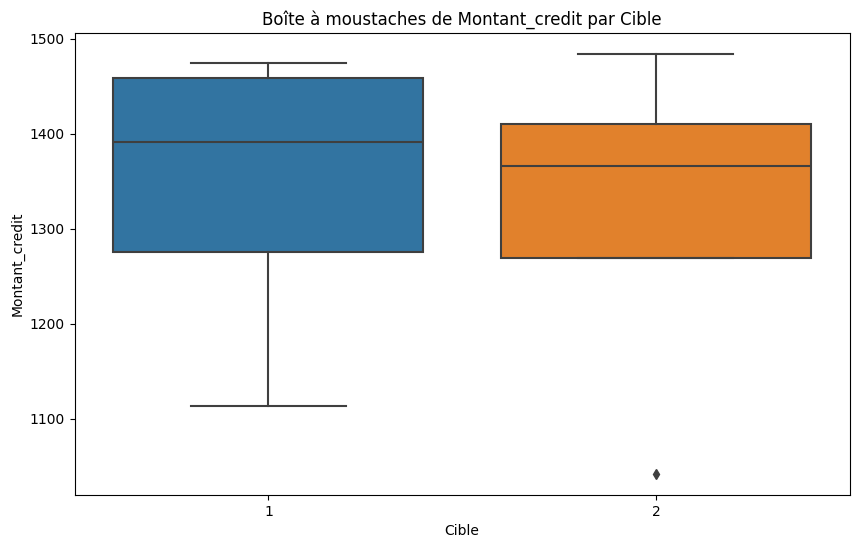

,Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,...,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Etranger,Cible,ID
76,A13,12,A32,A40,1330,A61,A72,4,A93,A101,...,26,A143,-1,1,A173,1,A191,-1,1,384
85,A12,12,A32,A43,1484,A65,A73,2,A94,A101,...,25,A143,-1,1,A173,1,A192,-1,2,436
99,A12,18,A32,A43,1113,A61,A73,4,A92,A103,...,26,A143,-1,1,A172,2,A191,A201,1,525
121,A14,18,A32,A43,1453,A61,A72,3,A92,A101,...,26,A143,A152,1,A173,1,-1,-1,1,680
147,A11,18,A32,A43,1345,A61,A73,4,A94,A101,...,26,A141,A152,1,A173,1,A191,A201,2,820
303,A13,12,A32,A42,1474,A61,A72,4,A92,A101,...,33,A141,A152,1,A174,1,A192,-1,1,35
347,A12,18,A32,A40,1042,A65,A73,4,A92,A101,...,33,A143,-1,1,A173,1,A191,-1,2,420
381,A14,12,A32,A40,1386,A63,A73,2,A92,A101,...,26,A143,A152,1,A173,1,-1,A201,2,648


In [88]:
from sklearn.ensemble import IsolationForest

def supprimer_valeurs_aberrantes(dataframe, colonne):
    """
    Supprime les valeurs aberrantes d'une colonne spécifique d'un DataFrame en utilisant Isolation Forest.
    
    Args:
    - dataframe : DataFrame Pandas - Le DataFrame contenant les données
    - colonne : str - Le nom de la colonne à traiter
    
    Returns:
    - dataframe_filtre : DataFrame Pandas - Le DataFrame avec les valeurs aberrantes supprimées
    """
    # Créer et entraîner le modèle Isolation Forest
    isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest.fit(dataframe[[colonne]])
    
    # Prédire les anomalies
    anomalies = isolation_forest.predict(dataframe[[colonne]])
    
    # Filtrer les données pour exclure les valeurs aberrantes
    dataframe_filtre = dataframe[anomalies == 1]
    
    # Tracer un boxplot pour la colonne
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cible', y=colonne, data=dataframe_filtre)
    plt.title(f'Boîte à moustaches de {colonne} par Cible')
    plt.show()
    
    return dataframe_filtre

colonnes_a_traiter = ['Age','Nb_credits','Duree_credit', 'Montant_credit']

for colonne in colonnes_a_traiter:
    df_storage = supprimer_valeurs_aberrantes(df_storage, colonne)
df_storage

In [47]:
# Encodage des variables catégorielles

In [89]:
def preprocess_special_values(df):
    """
    Remplace les valeurs spéciales par NaN dans le DataFrame, puis remplace les valeurs NaN
    par la valeur la plus fréquente dans chaque colonne spécifiée.

    Args:
    - df : DataFrame Pandas - Le DataFrame contenant les données

    Returns:
    - df_processed : DataFrame Pandas - Le DataFrame avec les valeurs spéciales remplacées
      et les valeurs NaN remplacées par les valeurs les plus fréquentes
    """
    # Remplacer les valeurs spéciales par NaN
    df_processed = df.replace('-1', pd.NA)

    # Remplacer les valeurs NaN par la valeur la plus fréquente dans chaque colonne spécifiée
    special_columns = ['Objet_credit', 'Statut_domicile', 'Telephone']
    for col in special_columns:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

    return df_processed
# Appeler la fonction preprocess_special_values sur votre DataFrame
df_processed = preprocess_special_values(df_storage)
df_processed

/var/tmp/ipykernel_3276/1201092053.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)


,Comptes,Duree_credit,Historique_credit,Objet_credit,Montant_credit,Epargne,Anciennete_emploi,Taux_effort,Situation_familiale,Garanties,...,Age,Autres_credits,Statut_domicile,Nb_credits,Type_emploi,Nb_pers_charge,Telephone,Etranger,Cible,ID
76,A13,12,A32,A40,1330,A61,A72,4,A93,A101,...,26,A143,A152,1,A173,1,A191,<NA>,1,384
85,A12,12,A32,A43,1484,A65,A73,2,A94,A101,...,25,A143,A152,1,A173,1,A192,<NA>,2,436
99,A12,18,A32,A43,1113,A61,A73,4,A92,A103,...,26,A143,A152,1,A172,2,A191,A201,1,525
121,A14,18,A32,A43,1453,A61,A72,3,A92,A101,...,26,A143,A152,1,A173,1,A191,<NA>,1,680
147,A11,18,A32,A43,1345,A61,A73,4,A94,A101,...,26,A141,A152,1,A173,1,A191,A201,2,820
303,A13,12,A32,A42,1474,A61,A72,4,A92,A101,...,33,A141,A152,1,A174,1,A192,<NA>,1,35
347,A12,18,A32,A40,1042,A65,A73,4,A92,A101,...,33,A143,A152,1,A173,1,A191,<NA>,2,420
381,A14,12,A32,A40,1386,A63,A73,2,A92,A101,...,26,A143,A152,1,A173,1,A191,A201,2,648


/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


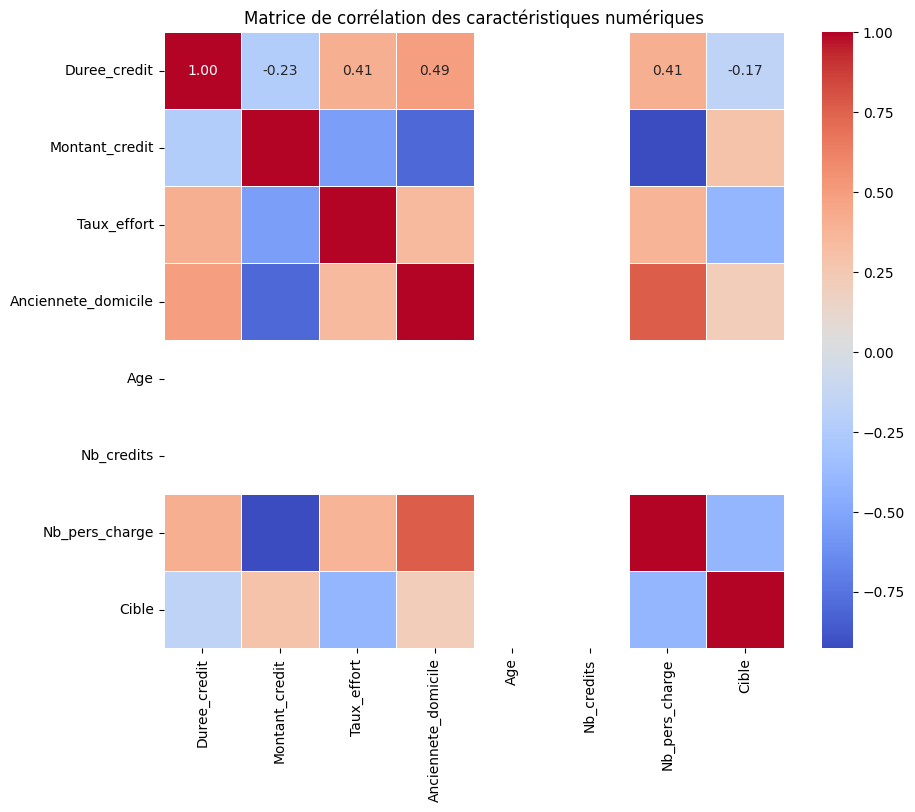

In [103]:
def afficher_matrice_correlation(dataframe, features):
    """
    Affiche la matrice de corrélation des caractéristiques numériques spécifiques dans un DataFrame.
    
    Args:
    - dataframe : DataFrame Pandas - Le DataFrame contenant les données
    - features : liste de str - Liste des noms des caractéristiques numériques à inclure dans la matrice de corrélation
    
    Returns:
    - None
    """
    # Sélectionner les caractéristiques numériques spécifiques
    numeric_features = dataframe[features]
    
    # Calculer la matrice de corrélation
    correlation_matrix = numeric_features.corr()
    
    # Afficher la matrice de corrélation avec seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title("Matrice de corrélation des caractéristiques numériques")
    plt.show()

# Utilisation de la fonction pour afficher la matrice de corrélation
colonnes_numeriques = ['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile', 'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible']
afficher_matrice_correlation(df, colonnes_numeriques)


In [94]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def encode_onehot(df, colonnes_catégorielles):
    """
    Fonction pour appliquer le codage one-hot aux colonnes catégorielles d'un DataFrame.

    Args:
    df (DataFrame): Le DataFrame contenant les données.
    colonnes_catégorielles (list): Liste des noms des colonnes catégorielles.

    Returns:
    DataFrame: Le DataFrame avec les colonnes catégorielles encodées en utilisant le codage one-hot.
    """
    # Utiliser la fonction get_dummies pour appliquer le codage one-hot
    df_encoded = pd.get_dummies(df, columns=colonnes_catégorielles)
    return df_encoded

colonnes_catégorielles = ['Comptes', 'Historique_credit', 'Objet_credit', 'Epargne', 'Anciennete_emploi', 'Situation_familiale', 'Garanties', 'Biens', 'Autres_credits', 'Statut_domicile', 'Type_emploi', 'Telephone', 'Etranger']
# Appliquer le codage one-hot
df_encoded = encode_onehot(df_processed, colonnes_catégorielles)

In [95]:
df_encoded

,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,Cible,ID,Comptes_A11,...,Biens_A122,Autres_credits_A141,Autres_credits_A143,Statut_domicile_A152,Type_emploi_A172,Type_emploi_A173,Type_emploi_A174,Telephone_A191,Telephone_A192,Etranger_A201
76,12,1330,4,1,26,1,1,1,384,False,...,False,False,True,True,False,True,False,True,False,False
85,12,1484,2,1,25,1,1,2,436,False,...,False,False,True,True,False,True,False,False,True,False
99,18,1113,4,4,26,1,2,1,525,False,...,False,False,True,True,True,False,False,True,False,True
121,18,1453,3,1,26,1,1,1,680,False,...,False,False,True,True,False,True,False,True,False,False
147,18,1345,4,3,26,1,1,2,820,True,...,False,True,False,True,False,True,False,True,False,True
303,12,1474,4,1,33,1,1,1,35,False,...,True,True,False,True,False,False,True,False,True,False
347,18,1042,4,2,33,1,1,2,420,False,...,True,False,True,True,False,True,False,True,False,False
381,12,1386,2,2,26,1,1,2,648,False,...,True,False,True,True,False,True,False,True,False,True


In [96]:
df_encoded.columns

Index(['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile',
       'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible', 'ID', 'Comptes_A11',
       'Comptes_A12', 'Comptes_A13', 'Comptes_A14', 'Historique_credit_A32',
       'Objet_credit_A40', 'Objet_credit_A42', 'Objet_credit_A43',
       'Epargne_A61', 'Epargne_A63', 'Epargne_A65', 'Anciennete_emploi_A72',
       'Anciennete_emploi_A73', 'Situation_familiale_A92',
       'Situation_familiale_A93', 'Situation_familiale_A94', 'Garanties_A101',
       'Garanties_A103', 'Biens_A121', 'Biens_A122', 'Autres_credits_A141',
       'Autres_credits_A143', 'Statut_domicile_A152', 'Type_emploi_A172',
       'Type_emploi_A173', 'Type_emploi_A174', 'Telephone_A191',
       'Telephone_A192', 'Etranger_A201'],
      dtype='object')

In [97]:
afficher_colonnes_par_type(df_encoded)

Colonnes de type int64:
['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile', 'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible', 'ID']

Colonnes de type bool:
['Comptes_A11', 'Comptes_A12', 'Comptes_A13', 'Comptes_A14', 'Historique_credit_A32', 'Objet_credit_A40', 'Objet_credit_A42', 'Objet_credit_A43', 'Epargne_A61', 'Epargne_A63', 'Epargne_A65', 'Anciennete_emploi_A72', 'Anciennete_emploi_A73', 'Situation_familiale_A92', 'Situation_familiale_A93', 'Situation_familiale_A94', 'Garanties_A101', 'Garanties_A103', 'Biens_A121', 'Biens_A122', 'Autres_credits_A141', 'Autres_credits_A143', 'Statut_domicile_A152', 'Type_emploi_A172', 'Type_emploi_A173', 'Type_emploi_A174', 'Telephone_A191', 'Telephone_A192', 'Etranger_A201']



In [98]:
# convertir les colonnes booléennes en flottants
def convert_bool_to_float(df):
    """
    Convertit les colonnes booléennes d'un DataFrame en entiers.

    Args:
    - df : DataFrame Pandas - Le DataFrame contenant les données

    Returns:
    - df : DataFrame Pandas - Le DataFrame avec les colonnes booléennes converties en entiers
    """
    # Parcourir les colonnes du DataFrame
    for colonne in df.columns:
        # Vérifier si le type de données de la colonne est booléen
        if df[colonne].dtype == bool:
            # Convertir la colonne booléenne en entiers
            df[colonne] = df[colonne].astype(float)
    
    return df

df_encoded = convert_bool_to_float(df_encoded)
df_encoded

,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,Cible,ID,Comptes_A11,...,Biens_A122,Autres_credits_A141,Autres_credits_A143,Statut_domicile_A152,Type_emploi_A172,Type_emploi_A173,Type_emploi_A174,Telephone_A191,Telephone_A192,Etranger_A201
76,12,1330,4,1,26,1,1,1,384,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
85,12,1484,2,1,25,1,1,2,436,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
99,18,1113,4,4,26,1,2,1,525,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
121,18,1453,3,1,26,1,1,1,680,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
147,18,1345,4,3,26,1,1,2,820,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
303,12,1474,4,1,33,1,1,1,35,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
347,18,1042,4,2,33,1,1,2,420,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
381,12,1386,2,2,26,1,1,2,648,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [99]:
afficher_colonnes_par_type(df_encoded)

Colonnes de type int64:
['Duree_credit', 'Montant_credit', 'Taux_effort', 'Anciennete_domicile', 'Age', 'Nb_credits', 'Nb_pers_charge', 'Cible', 'ID']

Colonnes de type float64:
['Comptes_A11', 'Comptes_A12', 'Comptes_A13', 'Comptes_A14', 'Historique_credit_A32', 'Objet_credit_A40', 'Objet_credit_A42', 'Objet_credit_A43', 'Epargne_A61', 'Epargne_A63', 'Epargne_A65', 'Anciennete_emploi_A72', 'Anciennete_emploi_A73', 'Situation_familiale_A92', 'Situation_familiale_A93', 'Situation_familiale_A94', 'Garanties_A101', 'Garanties_A103', 'Biens_A121', 'Biens_A122', 'Autres_credits_A141', 'Autres_credits_A143', 'Statut_domicile_A152', 'Type_emploi_A172', 'Type_emploi_A173', 'Type_emploi_A174', 'Telephone_A191', 'Telephone_A192', 'Etranger_A201']



In [100]:
def scale_data(df):
    """
    Fonction pour normaliser les données numériques d'un DataFrame.
    
    Args:
    df (DataFrame): Le DataFrame contenant les données.
    
    Returns:
    DataFrame: Le DataFrame avec les données numériques normalisées.
    """
    # Sélectionner les colonnes numériques
    colonnes_numeriques = df.select_dtypes(include=['int']).columns
    
    # Créer un objet StandardScaler
    scaler = StandardScaler()
    
    # Appliquer la normalisation sur les colonnes numériques
    df_scaled = df.copy()
    df_scaled[colonnes_numeriques] = scaler.fit_transform(df_scaled[colonnes_numeriques])
    
    return df_scaled

# Appliquer la normalisation
df_preprocessed = scale_data(df_encoded)

In [101]:
df_preprocessed

,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,Cible,ID,Comptes_A11,...,Biens_A122,Autres_credits_A141,Autres_credits_A143,Statut_domicile_A152,Type_emploi_A172,Type_emploi_A173,Type_emploi_A174,Telephone_A191,Telephone_A192,Etranger_A201
76,-1.0,0.010463,0.729325,-0.830747,-0.520834,0.0,-0.377964,-1.0,-0.491442,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
85,-1.0,1.002069,-1.604515,-0.830747,-0.841347,0.0,-0.377964,1.0,-0.258063,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
99,1.0,-1.386799,0.729325,2.017529,-0.520834,0.0,2.645751,-1.0,0.141374,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
121,1.0,0.802460,-0.437595,-0.830747,-0.520834,0.0,-0.377964,-1.0,0.837022,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
147,1.0,0.107048,0.729325,1.068103,-0.520834,0.0,-0.377964,1.0,1.465349,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
303,-1.0,0.937679,0.729325,-0.830747,1.722759,0.0,-0.377964,-1.0,-2.057772,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
347,1.0,-1.843968,0.729325,0.118678,1.722759,0.0,-0.377964,1.0,-0.329872,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
381,-1.0,0.371047,-1.604515,0.118678,-0.520834,0.0,-0.377964,1.0,0.693404,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Étape 1 : Diviser les données en ensembles d'entraînement et de test
X = df_preprocessed.drop(columns=['Cible'])  # Caractéristiques
y = df_preprocessed['Cible']  # Cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
X_train.head()

,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,ID,Comptes_A11,Comptes_A12,...,Biens_A122,Autres_credits_A141,Autres_credits_A143,Statut_domicile_A152,Type_emploi_A172,Type_emploi_A173,Type_emploi_A174,Telephone_A191,Telephone_A192,Etranger_A201
76,-1.0,0.010463,0.729325,-0.830747,-0.520834,0.0,-0.377964,-0.491442,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
381,-1.0,0.371047,-1.604515,0.118678,-0.520834,0.0,-0.377964,0.693404,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
99,1.0,-1.386799,0.729325,2.017529,-0.520834,0.0,2.645751,0.141374,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
147,1.0,0.107048,0.729325,1.068103,-0.520834,0.0,-0.377964,1.465349,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
121,1.0,0.802460,-0.437595,-0.830747,-0.520834,0.0,-0.377964,0.837022,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [110]:
X_test.head()

,Duree_credit,Montant_credit,Taux_effort,Anciennete_domicile,Age,Nb_credits,Nb_pers_charge,ID,Comptes_A11,Comptes_A12,...,Biens_A122,Autres_credits_A141,Autres_credits_A143,Statut_domicile_A152,Type_emploi_A172,Type_emploi_A173,Type_emploi_A174,Telephone_A191,Telephone_A192,Etranger_A201
85,-1.0,1.002069,-1.604515,-0.830747,-0.841347,0.0,-0.377964,-0.258063,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
303,-1.0,0.937679,0.729325,-0.830747,1.722759,0.0,-0.377964,-2.057772,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [143]:
"""
Résumé de la démarche :
1. Modélisation initiale : Entraînement de plusieurs modèles sur les données d'entraînement et évaluation de leur performance.
2. Validation croisée : Utilisation de la validation croisée pour évaluer les modèles de manière plus robuste.
3. Évaluation détaillée des modèles : Calcul de diverses métriques de performance pour chaque modèle.
4. Tuning des hyperparamètres : Recherche par grille pour ajuster les hyperparamètres des modèles sélectionnés.
5. Validation croisée stratifiée : Utilisation d'une validation croisée stratifiée pour éviter les biais dus au déséquilibre des classes.
6. Utilisation d'une approche d'ensemble : Combinaison des meilleurs modèles à l'aide d'un Voting Classifier.
"""


"\nRésumé de la démarche :\n1. Modélisation initiale : Entraînement de plusieurs modèles sur les données d'entraînement et évaluation de leur performance.\n2. Validation croisée : Utilisation de la validation croisée pour évaluer les modèles de manière plus robuste.\n3. Évaluation détaillée des modèles : Calcul de diverses métriques de performance pour chaque modèle.\n4. Tuning des hyperparamètres : Recherche par grille pour ajuster les hyperparamètres des modèles sélectionnés.\n5. Validation croisée stratifiée : Utilisation d'une validation croisée stratifiée pour éviter les biais dus au déséquilibre des classes.\n6. Utilisation d'une approche d'ensemble : Combinaison des meilleurs modèles à l'aide d'un Voting Classifier.\n"

In [114]:
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.4 MB/s eta 0:00:0000:0100:01


In [118]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialiser les modèles
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Artificial Neural Network": MLPClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Entraîner et évaluer les modèles
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Trier les modèles par précision décroissante
sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

# Afficher les précisions des modèles
for name, accuracy in sorted_accuracies:
    print(f"{name}: {accuracy}")


Random Forest: 1.0
Gradient Boosting: 1.0
Logistic Regression: 0.5
Support Vector Machine: 0.5
Artificial Neural Network: 0.5
K-Nearest Neighbors: 0.5
Naive Bayes: 0.5


In [125]:
from sklearn.model_selection import cross_val_score

# Appliquer la validation croisée pour chaque modèle
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    print(f"{name}: {scores.mean()}")


Random Forest: 0.3333333333333333
Gradient Boosting: 0.5
Logistic Regression: 0.16666666666666666
Support Vector Machine: 0.16666666666666666
Artificial Neural Network: 0.3333333333333333
K-Nearest Neighbors: nan
Naive Bayes: 0.3333333333333333


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_response.py", line 210, in _get_response_values
    y_pred = prediction_method(X)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 271, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/nei

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculer les prédictions pour chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Afficher les résultats
    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Confusion matrix:\n{confusion}\n")


Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Confusion matrix:
[[1 0]
 [0 1]]

Gradient Boosting:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Confusion matrix:
[[1 0]
 [0 1]]

Logistic Regression:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5
Confusion matrix:
[[1 0]
 [1 0]]

Support Vector Machine:
Accuracy: 0.5
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5
Confusion matrix:
[[1 0]
 [1 0]]

Artificial Neural Network:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0
Confusion matrix:
[[1 0]
 [0 1]]

K-Nearest Neighbors:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
ROC-AUC: 0.5
Confusion matrix:
[[0 1]
 [0 1]]

Naive Bayes:
Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1-score: 0.6666666666666666
ROC-AUC: 0.5
Confusion matrix:
[[0 1]
 [0 1]]



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [127]:
# OPtimisation du modèle , turning des hyperparametre avec gridsearch

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Définir les grilles de paramètres pour chaque modèle
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gbt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Créer des objets GridSearchCV pour chaque modèle
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy')
grid_search_gbt = GridSearchCV(GradientBoostingClassifier(), param_grid_gbt, cv=3, scoring='accuracy')

# Exécuter la recherche par grille pour chaque modèle
grid_search_rf.fit(X_train, y_train)
grid_search_gbt.fit(X_train, y_train)

# Afficher les meilleurs paramètres et les meilleurs scores pour chaque modèle
print("Random Forest - Meilleurs paramètres:", grid_search_rf.best_params_)
print("Random Forest - Meilleur score:", grid_search_rf.best_score_)

print("Gradient Boosting - Meilleurs paramètres:", grid_search_gbt.best_params_)
print("Gradient Boosting - Meilleur score:", grid_search_gbt.best_score_)


Random Forest - Meilleurs paramètres: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest - Meilleur score: 0.6666666666666666
Gradient Boosting - Meilleurs paramètres: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - Meilleur score: 0.5


In [137]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Définir les modèles à tuner
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

# Définir les grilles de recherche des hyperparamètres
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Définir la stratégie de validation croisée stratifiée
cv_stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialiser les objets GridSearchCV pour chaque modèle
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=cv_stratified, scoring='accuracy')
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=cv_stratified, scoring='accuracy')

# Adapter les objets GridSearchCV aux données
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et scores
print("Random Forest - Meilleurs paramètres:", rf_grid_search.best_params_)
print("Random Forest - Meilleur score:", rf_grid_search.best_score_)
print("Gradient Boosting - Meilleurs paramètres:", gb_grid_search.best_params_)
print("Gradient Boosting - Meilleur score:", gb_grid_search.best_score_)


Random Forest - Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Meilleur score: 0.6666666666666666
Gradient Boosting - Meilleurs paramètres: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Gradient Boosting - Meilleur score: 0.6666666666666666


In [140]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier

# Définir les hyperparamètres à rechercher pour Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Définir les hyperparamètres à rechercher pour Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Créer les classificateurs
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Définir la stratégie de validation croisée
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Effectuer la recherche des hyperparamètres pour Random Forest
rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv_strat, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Effectuer la recherche des hyperparamètres pour Gradient Boosting
gb_grid = GridSearchCV(gb, gb_param_grid, cv=cv_strat, scoring='accuracy', n_jobs=-1)
gb_grid.fit(X_train, y_train)

# Obtenir les meilleurs modèles à partir des résultats de la recherche
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

# Utiliser une approche d'ensemble pour combiner les modèles
ensemble_model = VotingClassifier(estimators=[('rf', best_rf), ('gb', best_gb)], voting='hard')
ensemble_model.fit(X_train, y_train)

# Évaluer l'ensemble model
ensemble_score = ensemble_model.score(X_test, y_test)
print("Ensemble Model Score:", ensemble_score)


Ensemble Model Score: 1.0


In [144]:
"""
Conclusion : Bien que les scores de précision sur les données de test semblent parfaits,
            la prudence est de mise en raison de la petite taille de l'ensemble de données.
            Une validation supplémentaire est recommandée pour confirmer la performance des modèles,
            en particulier lorsqu'ils sont appliqués à de nouvelles données.
"""

"\nConclusion : Bien que les scores de précision sur les données de test semblent parfaits,\n            la prudence est de mise en raison de la petite taille de l'ensemble de données. \n            Une validation supplémentaire est recommandée pour confirmer la performance des modèles,\n            en particulier lorsqu'ils sont appliqués à de nouvelles données.\n"

In [145]:
import joblib

# Enregistrer le meilleur modèle Random Forest
best_rf_model = rf_grid_search.best_estimator_
rf_model_path = "best_rf_model.pkl"
joblib.dump(best_rf_model, rf_model_path)
print("Meilleur modèle Random Forest enregistré avec succès dans:", rf_model_path)

# Enregistrer le meilleur modèle Gradient Boosting
best_gb_model = gb_grid_search.best_estimator_
gb_model_path = "best_gb_model.pkl"
joblib.dump(best_gb_model, gb_model_path)
print("Meilleur modèle Gradient Boosting enregistré avec succès dans:", gb_model_path)


Meilleur modèle Random Forest enregistré avec succès dans: best_rf_model.pkl
Meilleur modèle Gradient Boosting enregistré avec succès dans: best_gb_model.pkl
